In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
!yolo checks

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="wKPgK90xGcfBdWp6f8tt")
project = rf.workspace("workspace-il5zj").project("object-detection-plm7l")
version = project.version(1)
dataset = version.download("yolov8")

In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 293MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Object-Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Object-Detection-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 4. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.07it/s]
                   all          4          4      0.704      0.988      0.912      0.788
               clavier          2          2       0.75          1      0.995      0.895
                souris          2          2      0.659      0.976      0.828       0.68
Speed: 0.4ms preprocess, 36.6ms inference, 0.0ms l

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/key_2.jpg

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/key_2.jpg: 256x640 1 clavier, 101.3ms
Speed: 6.9ms preprocess, 101.3ms inference, 875.3ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/souris-usb-havit-ms753-tunisie.jpg

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/souris-usb-havit-ms753-tunisie.jpg: 640x640 1 souris, 37.0ms
Speed: 3.4ms preprocess, 37.0ms inference, 610.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


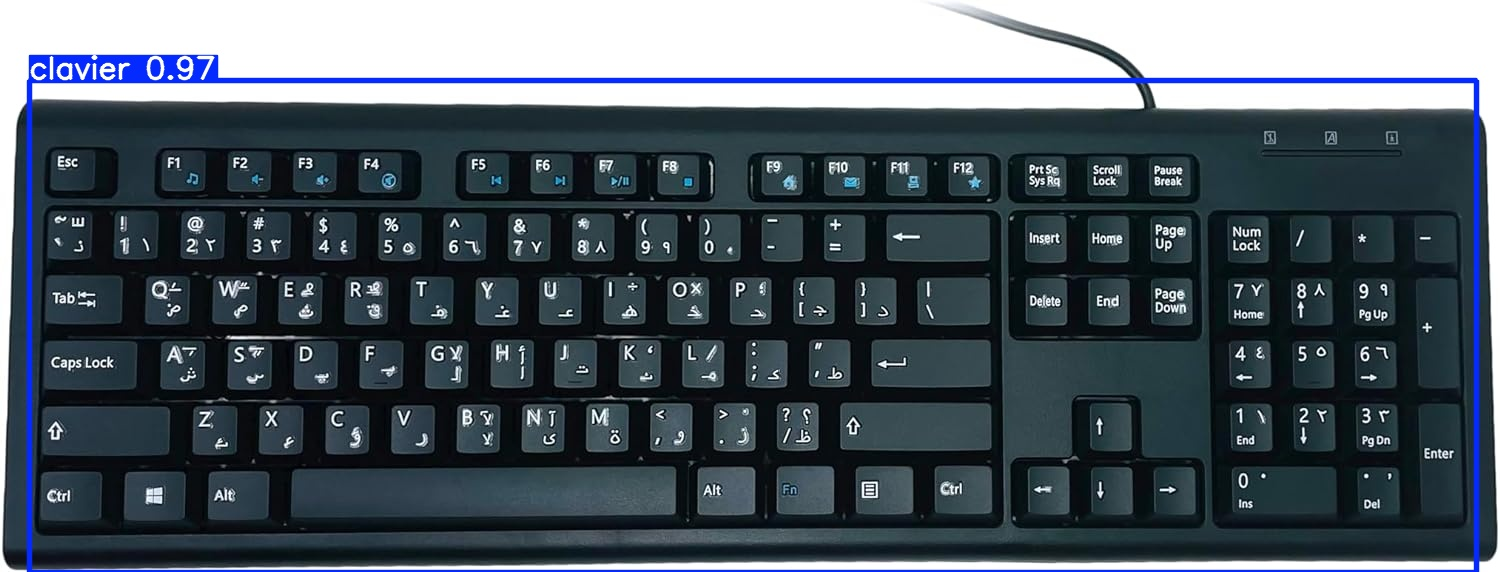

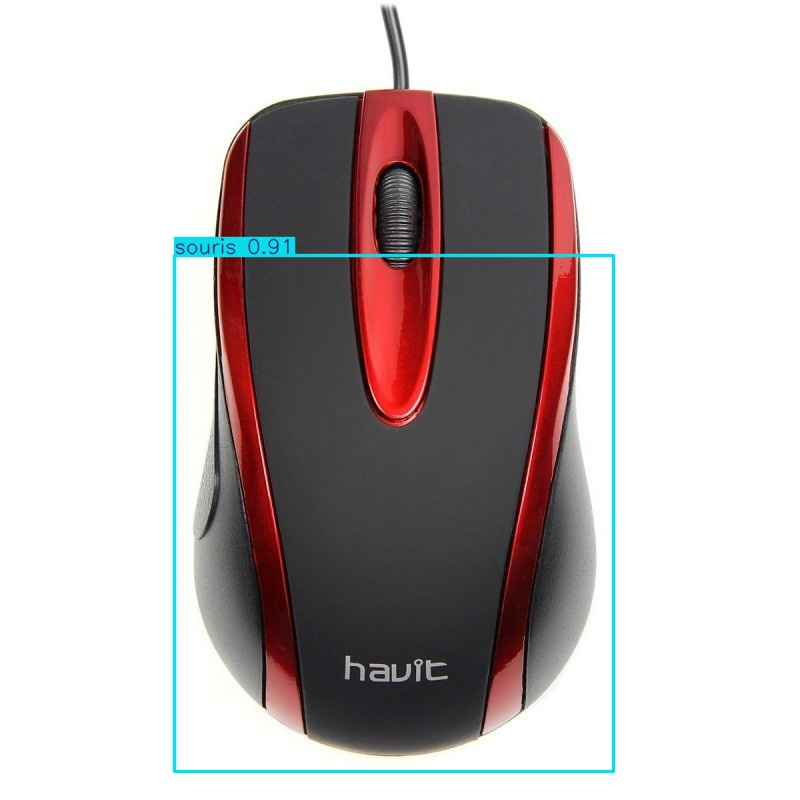

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")